<a href="https://colab.research.google.com/github/LuisCarlosJaramillo/Modelo_Neuronal/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RED NEURONAL**

Paso 1: Importar las bibliotecas necesarias primero, debes importar las bibliotecas necesarias:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Paso 2: Cargar el conjunto de datos MNIST, MNIST es un conjunto de datos popular que contiene imagenes de digitos escritos a mano. Vamos a cargar este conjunto de datos y dividirlo en conjuntos de entrenamiento y prueba:

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Paso 3: Preprocesar los datos, es importante normalizar los datos antes de entrenar una red neuronal. Normalizamos los valores de pixeles en el rango [0, 1]:

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Paso 4: Construir el modelo de Red Neuronal, a continuacion construimos un modelo de red neuronal simple con dos capas densas:

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

En este ejemplo la capa Flatten convierte las imagenes de 28x28 en un vector unidimensional. Luego hay una capa densa con 128 unidades y activacion ReLu. Despues se agrega una capa de Dropout para regularizar la red y finalmente una capa densa de salida con 10 unidades para clasificar los digitos del 0 al 9.

Paso 5: Compilar el modelo.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Paso 6: Entrenar el modelo.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2903 - accuracy: 0.9152 - val_loss: 0.1362 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1404 - accuracy: 0.9582 - val_loss: 0.0940 - val_accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1046 - accuracy: 0.9689 - val_loss: 0.0907 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9732 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.0747 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0719 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9808 - val_loss: 0.0698 - val_accuracy:

Este codigo entrena el modelo durante 10 epocas, utilizando los datos de entrenamiento y valida el modelo en los datos de prueba.


Paso 7: Evaluar el modelo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nPrecisión en los datos de prueba:", test_acc)

313/313 - 1s - loss: 0.0651 - accuracy: 0.9802 - 731ms/epoch - 2ms/step

Precisión en los datos de prueba: 0.9801999926567078


Esto evaluara el modelo en el conjunto de datos de prueba y mostarara la precision alcanzada.

Paso 8: Visualizar resultados

Puedes visualizar la precision y la perdida durante el entrenamiento utilizando graficos. Por ejemplo

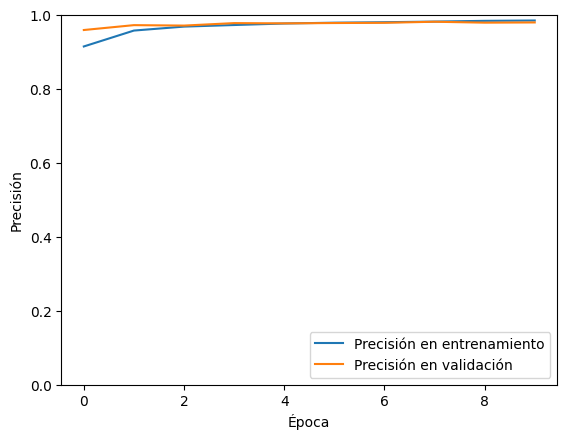

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**PROBEMOS**

In [ ]:
from PIL import Image
import numpy as np

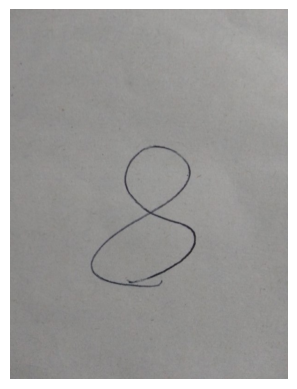

In [ ]:
# Cargar la imagen
imagen = Image.open('numero8.jpeg')
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Para ocultar los ejes
plt.show()

In [ ]:
# Cambiar el tamaño a 28x28 (como en MNIST)
imagen = imagen.resize((28, 28))

# Convertir la imagen a escala de grises
imagen = imagen.convert('L')

# Convertir la imagen a un array de numpy y normalizar
imagen = np.array(imagen) / 255.0

# Asegurarse de que la imagen tenga la forma adecuada (28x28x1)
imagen = imagen.reshape(1, 28, 28)

In [59]:
# Hacer la prediccion
predicciones = model.predict(imagen)

# Obtener la etiqueta predicha (digito)
etiqueta_predicha = np.argmax(predicciones)

print(f"El digito predicho es: {etiqueta_predicha}")

1/1 [==============================] - 0s 21ms/step
El digito predicho es: 5


In [55]:
predicciones

array([[-18.473564 , -11.188269 ,  -5.6635094,   3.3644814, -62.151737 ,
         19.068182 ,  -4.942134 , -11.298867 ,  -4.5151634, -40.13035  ]],
      dtype=float32)